# **EletroMag - Medidor eletrônico de energia** #

In [49]:
#Bibliotecas
from cmath import pi, sqrt
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

---
Na célula a seguir serão definidas os parâmetros do sistema já conhecidos.:


Informações conhecidas na malha principal

In [50]:
# Voltagem da fonte
Vf = 220
# Impedância da carga
ZC = 1000
# Frequência da fonte
f = 60
# Frequência angular
w=2*pi*f
# Corrente real
Iref= Vf/ZC

Bobinas Medições

In [60]:
# Bobina 300 voltas
R300=1.4 #ohms
L300=825e-3 # Henrys
# Bonina de 1200 Voltas
R1200=7.3 #ohms
L1200=8.5 # Henrys

Calculo dos L:

L1 = N1^2*L2/N2^2
L2 = N2^2*L1/N1^2

Informações defenidas no Transformador de corrente

In [51]:
# Resistencia do Transformador de corrente do lado primário
RC1 = 5 # Ohms
# Impedância do Transformador de corrente do lado primário
LC1 = 30e-3 # Henrys
# Resistencia do Transformador de corrente lado secundário
RC2 = 5 # Ohms
# Impedância do Transformador de corrente lado secundário
LC2 = 300e-3 # Henrys
# Resistor shunt
RS = 1 # Ohms

# Medias das Impedâncias do transformador de corrente
M1 = sqrt(LC1*LC2)

# Impedância em forma complexa
XM1=1j*w*M1
XC1=1j*w*LC1
XC2=1j*w*LC2

Informações defenidas no Transformador de Tensão

In [52]:
# Resistencia do Transformador de Tensão lado primário
RT1 = 5
# Impedância do Transformador de Tensão lado primário
LT1 = 300e-3
# Resistencia do Transformador de Tensão lado secundário
RT2 = 5
# Impedância do Transformador de Tensão lado secundário
LT2 = 5

# Resistor shunt imaginário para poder calcular I2, resistência do ar
RS2 = 1e9 # Ohms

# Medias das Impedâncias do transformador de tensão
M2 = sqrt(LT1*LT2)

# Impedância em forma complexa
XM2=1j*w*M2
XT1=1j*w*LT1
XT2=1j*w*LT2

Funções para calcular as correntes estimadas

In [53]:
def correntes_em_TC() -> tuple[complex, complex]:
    Z=np.array([[RC1+XC1+ZC, -XM1], [-XM1, RC2+XC2+RS]])
    V=np.array([Vf, 0])

    I = np.dot(linalg.inv(Z), V)

    return I[0], I[1]

def correntes_em_TT() -> tuple[complex, complex, complex, complex]:
    Z=np.array([[0, ZC, 0, 0], [-1, 1, 1, 0], [0, -ZC, RT1+XT1, -XM2], [0, 0, -XM2, RT2+LT2+RS2]])
    V=np.array([Vf, 0, 0, 0])

    I = np.dot(linalg.inv(Z), V)

    return I[0], I[1], I[2], I[3]

---
Definindo as funções que serão utilizadas no projeto:

In [54]:
def v_em_TC(L2: float) -> complex:
    M = sqrt(LC1*L2)

    XM=1j*w*M
    XL2=1j*w*L2
    
    Z=np.array([[RC1+XC1+ZC, -XM], [-XM, RC2+XL2+RS]])
    V=np.array([Vf, 0])

    I = np.dot(linalg.inv(Z), V)

    return I[1]*RS

def v_em_TT(L1: float) -> complex:
    M = sqrt(LT1*L1)

    XM=1j*w*M

    XL1=1j*w*L1

    Z=np.array([[-1, 1, 1, 0], [0, ZC, 0, 0], [0, -ZC, RT1+XL1, -XM], [0, 0, -XM, RT2+LT2+RS2]])
    V=np.array([0, Vf, 0, 0])

    I = np.dot(linalg.inv(Z), V)

    return I[3]*RS2

In [55]:
ls = np.arange(1e-3, 10, 1e-3)

V2A_list=[]
V2V_list=[]
Ifc_list=[]
Ift_list=[]

for l in ls:
    V2A = abs(v_em_TC(l))
    V2V = abs(v_em_TT(l))

    Ifc = abs(correntes_em_TC()[0])
    Ift = abs(correntes_em_TT()[0])

    V2A_list.append(V2A)
    V2V_list.append(V2V)
    Ifc_list.append(Ifc)
    Ift_list.append(Ift)
    
    print(f'Quando o indutor for de: {l:.3f}H V2A é: {V2A:.3f}V e V2V é: {V2V:.3f}V')

Quando o indutor for de: 0.001H V2A é: 0.075V e V2V é: 286.493V
Quando o indutor for de: 0.002H V2A é: 0.106V e V2V é: 401.769V
Quando o indutor for de: 0.003H V2A é: 0.128V e V2V é: 485.366V
Quando o indutor for de: 0.004H V2A é: 0.146V e V2V é: 550.136V
Quando o indutor for de: 0.005H V2A é: 0.160V e V2V é: 601.136V
Quando o indutor for de: 0.006H V2A é: 0.172V e V2V é: 641.193V
Quando o indutor for de: 0.007H V2A é: 0.182V e V2V é: 672.253V
Quando o indutor for de: 0.008H V2A é: 0.190V e V2V é: 695.839V
Quando o indutor for de: 0.009H V2A é: 0.196V e V2V é: 713.212V
Quando o indutor for de: 0.010H V2A é: 0.201V e V2V é: 725.444V
Quando o indutor for de: 0.011H V2A é: 0.204V e V2V é: 733.451V
Quando o indutor for de: 0.012H V2A é: 0.207V e V2V é: 738.012V
Quando o indutor for de: 0.013H V2A é: 0.209V e V2V é: 739.785V
Quando o indutor for de: 0.014H V2A é: 0.210V e V2V é: 739.318V
Quando o indutor for de: 0.015H V2A é: 0.211V e V2V é: 737.069V
Quando o indutor for de: 0.016H V2A é: 0

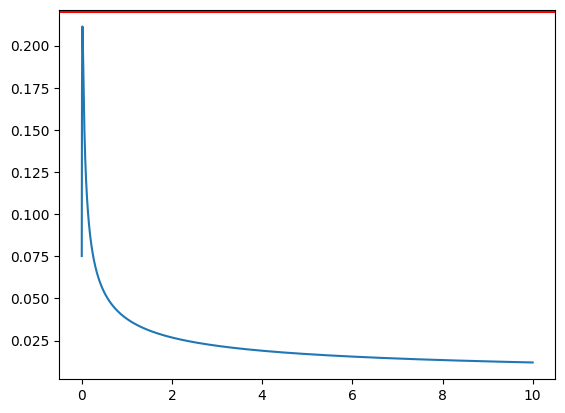

In [59]:
plt.plot(ls, V2A_list, label='V2A')
plt.axhline(y=Iref, color='r', linestyle='-')
plt.show()

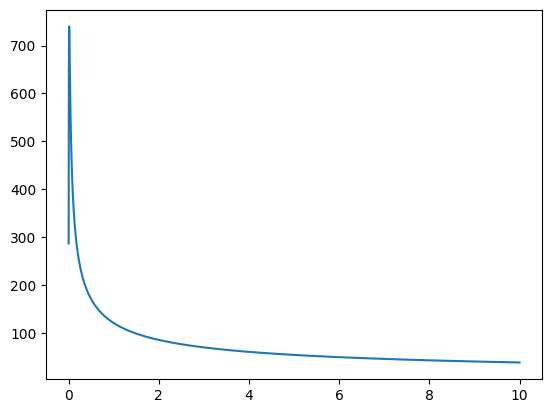

In [57]:
plt.plot(ls, V2V_list, label='V2V')